### Espumantes

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from itertools import chain  # Import necessário para usar chain

# Inicializando a sessão do Spark
spark = SparkSession.builder \
    .appName("EDA Wine") \
    .getOrCreate()

# Mapeamento de nomes de países para padronização
mapeamento_anos = {
    '200878': '2008', '200879': '2008.1',
    '200980': '2009', '200981': '2009.1',
    '201082': '2010', '201083': '2010.1',
    '201184': '2011', '201185': '2011.1',
    '201286': '2012', '201287': '2012.1',
    '201388': '2013', '201389': '2013.1',
    '201490': '2014', '201491': '2014.1',
    '201592': '2015', '201593': '2015.1',
    '201694': '2016', '201695': '2016.1',
    '201796': '2017', '201797': '2017.1',
    '201898': '2018', '201899': '2018.1',
    '2019100': '2019', '2019101': '2019.1',
    '2020102': '2020', '2020103': '2020.1',
    '2021104': '2021', '2021105': '2021.1',
    '2022106': '2022', '2022107': '2022.1',
    '2023108': '2023', '2023109': '2023.1'
}

mapeamento_paises = {
    'Alemanha, República Democrática': 'Alemanha',
    'Alemanha, República Democrática da': 'Alemanha',
    'África do Sul': 'Africa do Sul',
    'Antígua e Barbuda': 'Antigua e Barbuda',
    'Arábia Saudita': 'Arabia Saudita',
    'Austrália': 'Australia',
    'Áustria': 'Austria',
    'Barein': 'Bahrein',
    'Belice': 'Belize',
    'Bélgica': 'Belgica',
    'Birmânia': 'Myanmar',
    'Bósnia-Herzegovina': 'Bosnia',
    'Bulgária': 'Bulgaria',
    'Burquina Faso': 'Burkina Faso',
    'Canadá': 'Canada',
    'Cingapura': 'Singapura',
    'Cocos (Keeling)': 'Ilhas Cocos',
    'Colômbia': 'Colombia',
    'Coreia do Sul, Republica da': 'Coreia do Sul',
    'Coréia do Sul': 'Coreia do Sul',
    'Coreia, Republica Sul': 'Coreia do Sul',
    'Coveite': 'Kuwait',
    'Djibuti': 'Djibouti',
    'Dominica, Ilha de': "Dominica",
    'Emirados Árabes Unidos': 'Emirados Arabes Unidos',
    'Eslovaca, Republica': 'Eslovaquia',
    'Eslovênia': 'Eslovenia',
    'Estados Unidos': 'Estados Unidos da América',
    'Estônia': 'Estonia',
    'Falkland (Ilhas Malvinas)': 'Ilhas Malvinas',
    'Falkland (Malvinas)': 'Ilhas Malvinas',
    'Filânldia': 'Finlandia',
    'Finlândia': 'Finlandia',
    'Geórgia': 'Georgia',
    'Grêcia': 'Grecia',
    'Grécia': 'Grecia',
    'Guiné Bissau': 'Guine-Bissau',
    'Guine Bissau': 'Guine-Bissau',
    'Guiné-Bissau': 'Guine-Bissau',
    'Guiné Equatorial': 'Guine Equatorial',
    'Índia': 'India',
    'Indonêsia': 'Indonesia',
    'Man, Ilha': 'Ilha de Man',
    'Virgens, Ilhas': 'Ilhas Virgens',
    'Islândia': 'Islandia',
    'Indonésia': 'Indonesia',
    'Itália': 'Italia',
    'Iugoslâvia': 'Iugoslavia',
    'Jérsei': 'Jersey',
    'Letônia': 'Letonia',
    'Libêria': 'Liberia',
    'Libéria': 'Liberia',
    'Lituânia': 'Lituania',
    'Malásia': 'Malasia',
    'Maldivas, Ilhas': 'Maldivas',
    'Maurício, Ilhas': 'Mauricio',
    'México': 'Mexico',
    'Nova Zelândia': 'Nova Zelandia',
    'Paises Baixos (Holanda)': 'Holanda',
    'Países Baixos': 'Holanda',
    'Panamá': 'Panama',
    'Polônia': 'Polonia',
    'Namíbia': 'Namibia',
    'Nicarágua': 'Nicaragua',
    'Quênia': 'Quenia',
    'Dominicana, República': 'Republica Dominicana',
    'República Dominicana': 'Republica Dominicana',
    'Tcheca, República': 'Republica Tcheca',
    'Centro-Africana, República': 'República Centro Africana',
    'República Federativa da Rússia': 'Russia',
    'Russia,  Federação da': 'Russia',
    'Rússia': 'Russia',
    'Suécia': 'Suecia',
    'Suiça': 'Suica',
    'Suíça': 'Suica',
    'São Tomé e Príncipe': 'Sao Tome e Principe',
    'São Tomé e Principe': 'Sao Tome e Principe',
    'Tailândia': 'Tailandia',
    'Taiwan (FORMOSA)': 'Taiwan',
    'Taiwan (Formosa)': 'Taiwan',
    'Tcheca, República': 'Republica Tcheca',
    'Trinidade Tobago': 'Trindade e Tobago',
    'Trinidade e Tobago': 'Trindade e Tobago',
    'Turcas e Caicos, ilhas': 'Ilhas Turcas e Caicos',
    'Suazilândia': 'Essuatini',
    'Outros(1)': 'Outros',
    'Provisão de Navios e Aeronaves': 'Provisao de Navios e Aeronaves'
}

# Função para aplicar o mapeamento dos nomes de países
def aplicar_mapeamento(df, mapeamento):
    # Aplicar o mapeamento de países com a função when().otherwise()
    condicoes = F.col("Pais")
    for k, v in mapeamento.items():
        condicoes = F.when(F.col("Pais") == k, v).otherwise(condicoes)
    
    # Atualizar a coluna 'Pais' com o mapeamento aplicado
    df = df.withColumn("Pais", condicoes)
    
    return df

# Função para filtrar, renomear e agrupar as colunas de um DataFrame
def filtrar_renomear_agrupamento(df, mapeamento, categoria):
    # Renomear a coluna 'País' para 'Pais' para evitar problemas de sintaxe
    df = df.withColumnRenamed("País", "Pais")
    
    # Aplicar o mapeamento de países
    df = aplicar_mapeamento(df, mapeamento)
    
    # Filtrar apenas as colunas dos últimos 15 anos conforme o mapeamento manual
    colunas_desejadas = ["Id", "Pais"] + [col for col in mapeamento.keys()]
    df_filtrado = df.select(*[col for col in colunas_desejadas if col in df.columns])
    
    # Renomeando as colunas conforme o mapeamento
    for col_atual, col_renomeado in mapeamento.items():
        if col_atual in df_filtrado.columns:
            df_filtrado = df_filtrado.withColumnRenamed(col_atual, col_renomeado)
    
    # Transformar em formato long (Ano, Valor)
    id_vars = ['Id', 'Pais']
    colunas_melt = [col for col in df_filtrado.columns if col not in id_vars]
    expr = ", ".join([f"'{col}', `{col}`" for col in colunas_melt])
    
    # Aplicar o 'melt' utilizando a função stack
    df_long = df_filtrado.selectExpr(
        "Id", 
        "Pais",  # Nome da coluna já renomeado
        f"stack({len(colunas_melt)}, {expr}) as (Ano, Valor)"
    )
    
    # Extrair a parte numérica do ano para eliminar o sufixo .1
    df_long = df_long.withColumn(
        "Ano", F.regexp_replace(F.col("Ano"), "\\.1$", "")
    )
    
    # Agrupar por 'Id', 'Pais' e 'Ano' e somar os valores
    df_agrupado = df_long.groupBy("Id", "Pais", "Ano").agg(
        F.sum("Valor").alias("Valor_Somado")
    )
    
    # Adicionar a coluna Categoria para diferenciar as origens dos dados
    df_agrupado = df_agrupado.withColumn("Categoria", F.lit(categoria))
    
    return df_agrupado



In [0]:
vinhos_mesa = (
    spark.read.format("csv")
    .option("header", "true")
    .option("delimiter", ";")
    .option("encoding", "UTF-8")
    .option("inferSchema", "true")
    .option("enforceSchema", "true")
    .load("/FileStore/tables/ExpVinho.csv")
)

vinhos_mesa_agrupado = filtrar_renomear_agrupamento(vinhos_mesa, mapeamento_anos, "Vinhos de Mesa")

# 2. Carregar e aplicar a transformação em espumantes
espumantes = (
    spark.read.format("csv")
    .option("header", "true")
    .option("delimiter", ";")
    .option("encoding", "UTF-8")
    .option("inferSchema", "true")
    .option("enforceSchema", "true")
    .load("/FileStore/tables/ExpEspumantes.csv")
)
espumantes_agrupado = filtrar_renomear_agrupamento(espumantes, mapeamento_anos, "Espumantes")

# 3. Carregar e aplicar a transformação em uvas_frescas
uvas_frescas = (
    spark.read.format("csv")
    .option("header", "true")
    .option("delimiter", ";")
    .option("encoding", "UTF-8")
    .option("inferSchema", "true")
    .option("enforceSchema", "true")
    .load("/FileStore/tables/ExpUva.csv")
)
uvas_frescas_agrupado = filtrar_renomear_agrupamento(uvas_frescas, mapeamento_anos, "Uvas Frescas")

# 4. Carregar e aplicar a transformação em suco_uva
suco_uva = (
    spark.read.format("csv")
    .option("header", "true")
    .option("delimiter", ";")
    .option("encoding", "UTF-8")
    .option("inferSchema", "true")
    .option("enforceSchema", "true")
    .load("/FileStore/tables/ExpSuco.csv")
)
suco_uva_agrupado = filtrar_renomear_agrupamento(suco_uva, mapeamento_anos, "Suco de Uva")

# Unir todos os DataFrames
df_unido = vinhos_mesa_agrupado.unionByName(espumantes_agrupado) \
                                .unionByName(uvas_frescas_agrupado) \
                                .unionByName(suco_uva_agrupado)

# Agrupar por 'Pais' e 'Ano' e somar os valores de todas as categorias, aplicando novamente o mapeamento
df_unido_mapeado = aplicar_mapeamento(df_unido, mapeamento_paises)

df_agrupado_geral = df_unido_mapeado.groupBy("Pais", "Ano").agg(
    F.sum("Valor_Somado").alias("Valor_Total")
)



In [0]:
# Agrupar o DataFrame final apenas por 'Pais', somando os valores totais de exportação
df_agrupado_por_pais = df_agrupado_geral.groupBy("Pais").agg(
    F.sum("Valor_Total").alias("Valor_Total_Por_Pais")
)

# Exibir o resultado
df_agrupado_por_pais.show(100)


+--------------------+--------------------+
|                Pais|Valor_Total_Por_Pais|
+--------------------+--------------------+
|          Luxemburgo|              509572|
|            Anguilla|                   0|
|              Russia|            64705788|
|         Cook, Ilhas|                 955|
|            Marrocos|                 160|
|            Jordânia|                 895|
|             Senegal|                  40|
|          Cabo Verde|               65969|
|             Belgica|            26474438|
|              Jersey|                  82|
|São Cristóvão e N...|                 235|
|            Djibouti|                  66|
|              Italia|             3502138|
|              França|             1521054|
|República Centro ...|                   0|
|Emirados Arabes U...|            26874322|
|            Mauricio|                   0|
|          Porto Rico|             3363115|
|              Mônaco|                 201|
|     Coreia do Norte|          

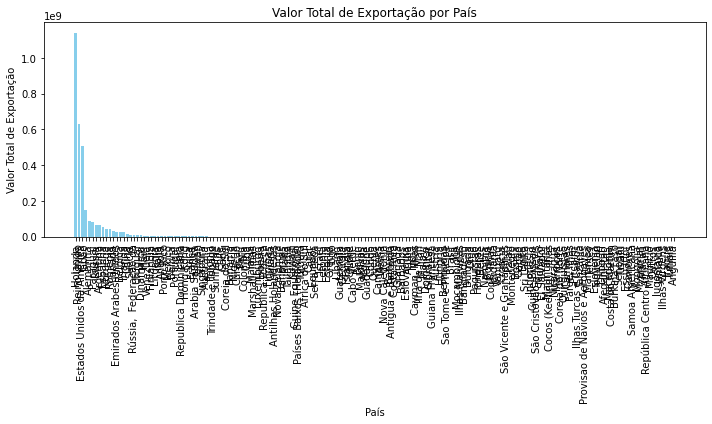

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

df_agrupado_por_pais_pd = df_agrupado_por_pais.toPandas()

# Ordenando os valores por valor total para melhor visualização
df_agrupado_por_pais_pd = df_agrupado_por_pais_pd.sort_values(by="Valor_Total_Por_Pais", ascending=False)

# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
plt.bar(df_agrupado_por_pais_pd["Pais"], df_agrupado_por_pais_pd["Valor_Total_Por_Pais"], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Valor Total de Exportação')
plt.title('Valor Total de Exportação por País')
plt.tight_layout()

# Mostrar o gráfico
plt.show()


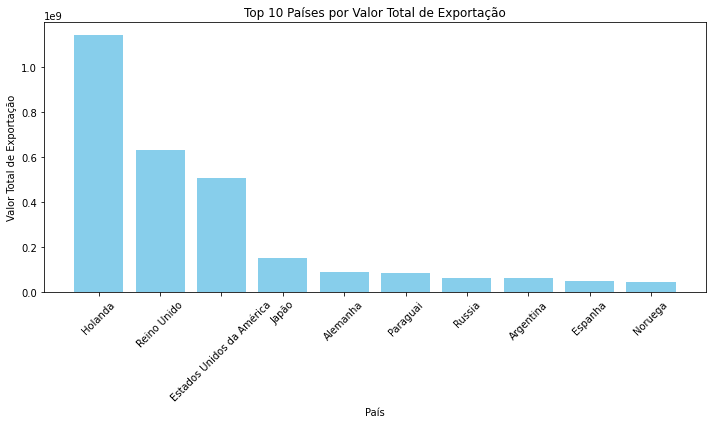

In [0]:
# Filtrando apenas os 10 países com maiores valores de exportação
df_top_10 = df_agrupado_por_pais_pd.nlargest(10, 'Valor_Total_Por_Pais')

# Criando o gráfico de colunas para os top 10 países
plt.figure(figsize=(10, 6))
plt.bar(df_top_10["Pais"], df_top_10["Valor_Total_Por_Pais"], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Valor Total de Exportação')
plt.title('Top 10 Países por Valor Total de Exportação')
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [0]:
# Ordenar por 'Valor_Total_Por_Pais' em ordem decrescente e selecionar os top 10
top_10_paises = df_agrupado_por_pais.orderBy(F.desc("Valor_Total_Por_Pais")).limit(10)

# Mostrar o resultado
top_10_paises.show(truncate=False)


+-------------------------+--------------------+
|Pais                     |Valor_Total_Por_Pais|
+-------------------------+--------------------+
|Holanda                  |1140983449          |
|Reino Unido              |629757741           |
|Estados Unidos da América|505969369           |
|Japão                    |150984262           |
|Alemanha                 |89172633            |
|Paraguai                 |83680720            |
|Russia                   |64705788            |
|Argentina                |63735034            |
|Espanha                  |51419283            |
|Noruega                  |44471037            |
+-------------------------+--------------------+



In [0]:
# Mostrar o resultado final, ordenado por 'Pais' e 'Ano'
df_agrupado_geral.orderBy("Pais", "Ano").show(100, truncate=False)


+-------------------+----+-----------+
|Pais               |Ano |Valor_Total|
+-------------------+----+-----------+
|Afeganistão        |2008|0          |
|Afeganistão        |2009|0          |
|Afeganistão        |2010|0          |
|Afeganistão        |2011|0          |
|Afeganistão        |2012|0          |
|Afeganistão        |2013|0          |
|Afeganistão        |2014|0          |
|Afeganistão        |2015|0          |
|Afeganistão        |2016|0          |
|Afeganistão        |2017|0          |
|Afeganistão        |2018|0          |
|Afeganistão        |2019|0          |
|Afeganistão        |2020|0          |
|Afeganistão        |2021|57         |
|Afeganistão        |2022|0          |
|Afeganistão        |2023|0          |
|Africa do Sul      |2008|0          |
|Africa do Sul      |2009|47430      |
|Africa do Sul      |2010|0          |
|Africa do Sul      |2011|0          |
|Africa do Sul      |2012|10063      |
|Africa do Sul      |2013|0          |
|Africa do Sul      |2014

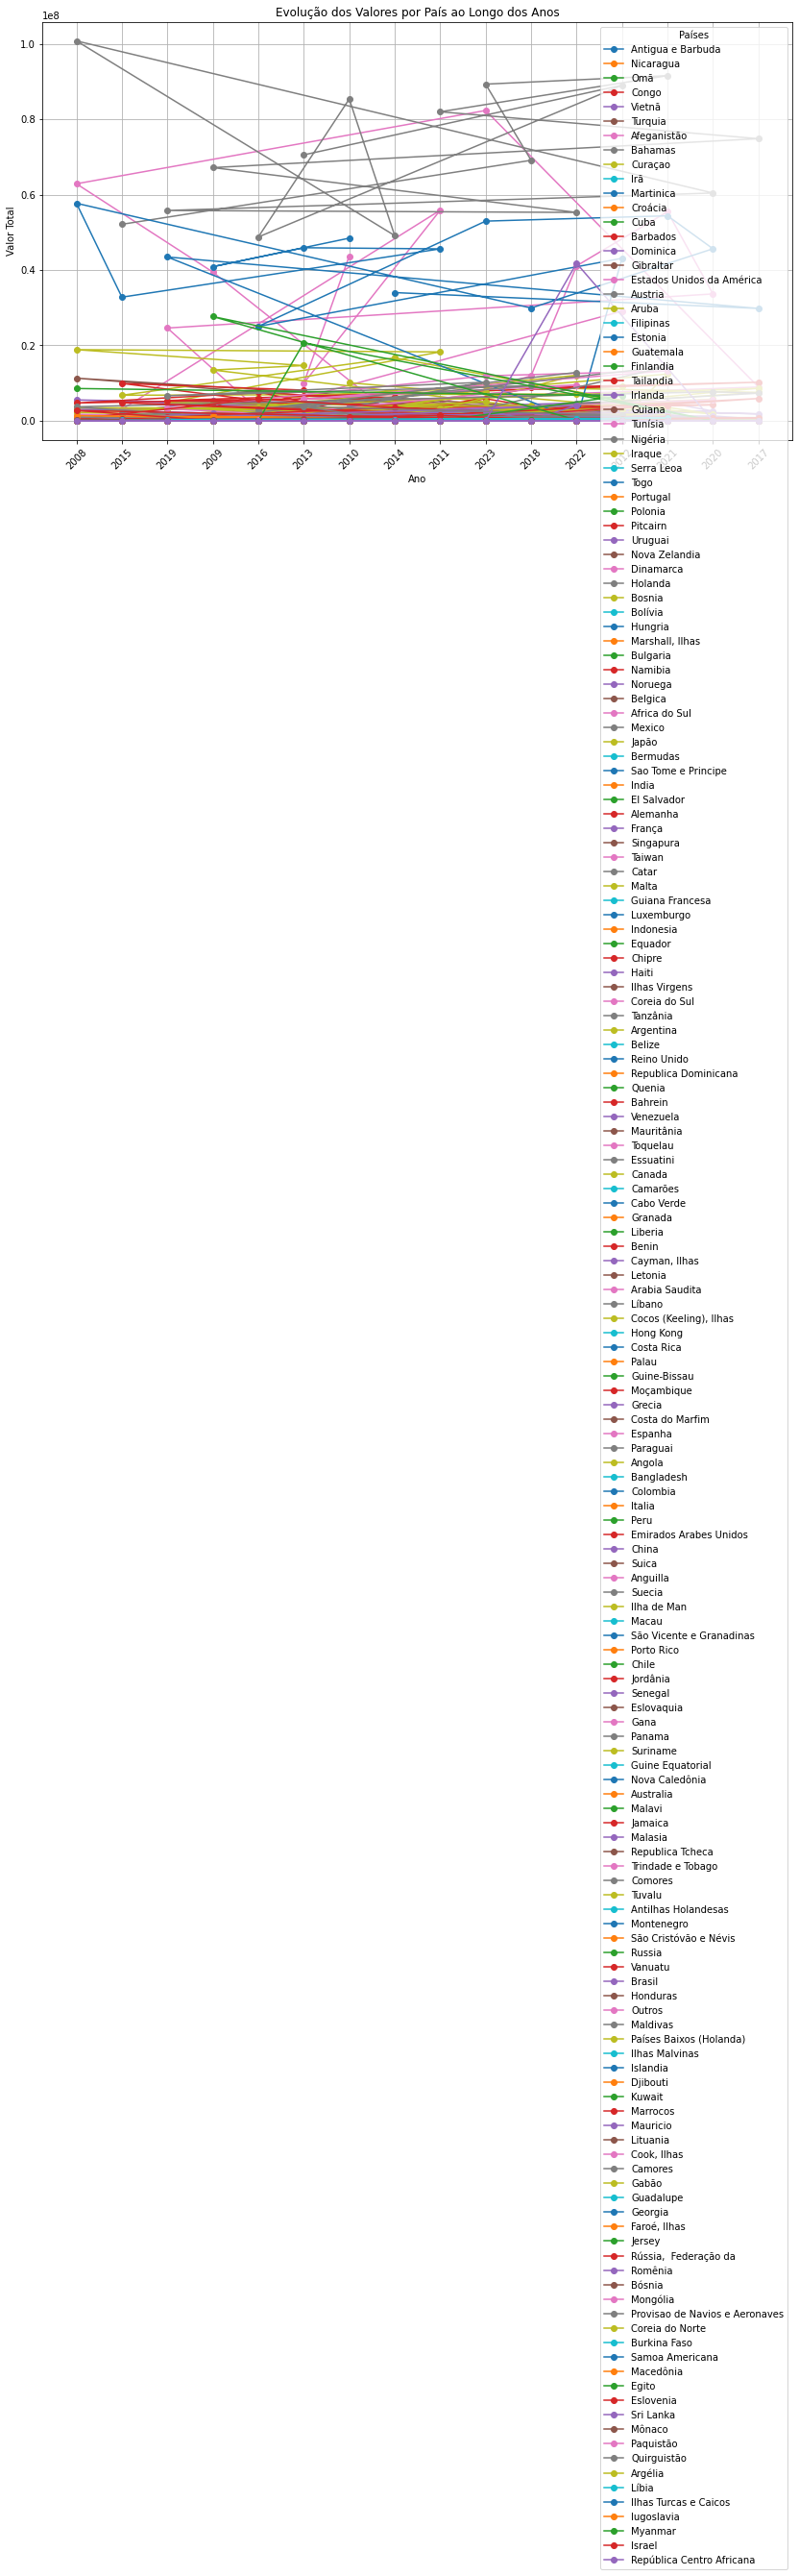

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Converter o DataFrame PySpark em Pandas
df_pandas = df_agrupado_geral.toPandas()

# Opcional: Filtrar os países de interesse ou anos de interesse, por exemplo:
# df_pandas = df_pandas[df_pandas['Pais'].isin(['Alemanha', 'França', 'Brasil'])]

# Criar o gráfico de linhas
plt.figure(figsize=(14, 8))
for pais in df_pandas['Pais'].unique():
    df_pais = df_pandas[df_pandas['Pais'] == pais]
    plt.plot(df_pais['Ano'], df_pais['Valor_Total'], marker='o', label=pais)

# Adicionar título e rótulos
plt.title('Evolução dos Valores por País ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.legend(title='Países')
plt.grid(True)

# Exibir o gráfico
plt.show()


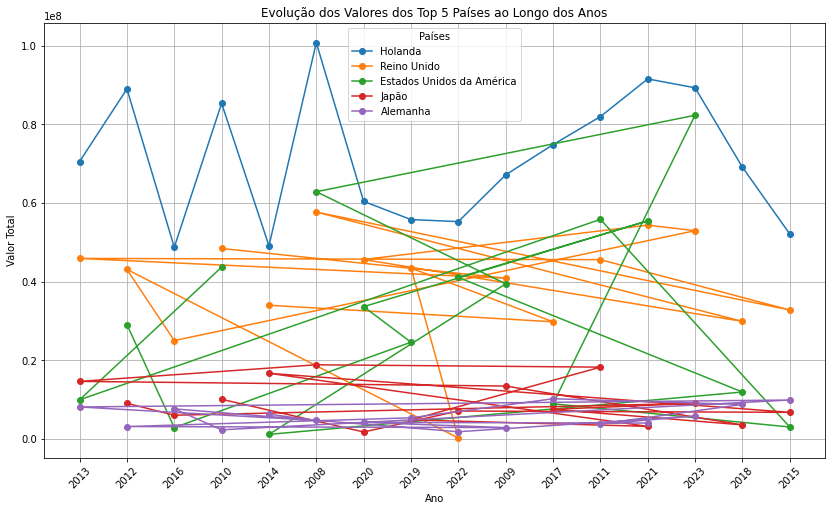

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Converter o DataFrame PySpark em Pandas
df_pandas = df_agrupado_geral.toPandas()

# Calcular o valor total acumulado por país
df_total_por_pais = df_pandas.groupby('Pais')['Valor_Total'].sum().reset_index()

# Ordenar pelos valores totais e selecionar os top 5 países
top_5_paises = df_total_por_pais.sort_values(by='Valor_Total', ascending=False).head(5)['Pais']

# Filtrar o DataFrame original para apenas os top 5 países
df_top_5 = df_pandas[df_pandas['Pais'].isin(top_5_paises)]

# Criar o gráfico de linhas apenas para os top 5 países
plt.figure(figsize=(14, 8))
for pais in top_5_paises:
    df_pais = df_top_5[df_top_5['Pais'] == pais]
    plt.plot(df_pais['Ano'], df_pais['Valor_Total'], marker='o', label=pais)

# Adicionar título e rótulos
plt.title('Evolução dos Valores dos Top 5 Países ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.legend(title='Países')
plt.grid(True)

# Exibir o gráfico
plt.show()


In [0]:

# Mostrar o resultado final
df_agrupado_geral.orderBy("Pais", "Ano").show(100, truncate=False)


+----------------------------------+----+-----------+
|Pais                              |Ano |Valor_Total|
+----------------------------------+----+-----------+
|Afeganistão                       |2008|0          |
|Afeganistão                       |2009|0          |
|Afeganistão                       |2010|0          |
|Afeganistão                       |2011|0          |
|Afeganistão                       |2012|0          |
|Afeganistão                       |2013|0          |
|Afeganistão                       |2014|0          |
|Afeganistão                       |2015|0          |
|Afeganistão                       |2016|0          |
|Afeganistão                       |2017|0          |
|Afeganistão                       |2018|0          |
|Afeganistão                       |2019|0          |
|Afeganistão                       |2020|0          |
|Afeganistão                       |2021|57         |
|Afeganistão                       |2022|0          |
|Afeganistão                